In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('Uni_linear.txt', header=None, names=['population', 'profit'])

In [5]:
print(data.head())
print(data.describe())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       population     profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


Text(0.5, 1.0, 'Profit vs population')

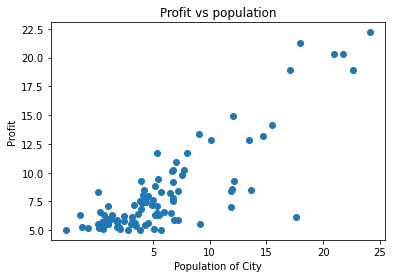

In [6]:
plt.scatter(data['profit'], data['population'])
plt.xlabel('Population of City')
plt.ylabel('Profit')
plt.xticks(np.arange(5,30,step=5))
plt.title("Profit vs population")

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    square_err = (X.dot(theta) - y) ** 2
    return (1/2*m) * np.sum(square_err)

In [27]:
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
computeCost(X, y, theta)
new_theta = theta - 0.01 * (1/ X.shape[0]) * np.dot(X.T, np.dot(X, theta) - y)
computeCost(X, y, new_theta)
new_theta = new_theta - 0.01 * (1/ X.shape[0]) * np.dot(X.T, np.dot(X, new_theta) - y)
computeCost(X, y, new_theta)

55810.36388700404

In [28]:
def gradientDescent(X, y, init_theta, learning_rate, iters_count):
    m = len(y)
    theta_history = [init_theta]
    J_history=[]
    for i in range(1499):
        new_theta = theta_history[-1] - learning_rate * (1/ m) * np.dot(X.T, np.dot(X, theta_history[-1]) - y)
        J_history.append(computeCost(X,y,new_theta))
        theta_history.append(new_theta)
    return theta_history[-1], theta_history, J_history

In [29]:
result_theta, theta_history, J_History = gradientDescent(X, y, theta, 0.01, 1499)

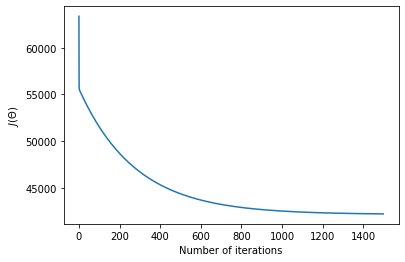

In [9]:
plt.plot(J_History)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\Theta)$')
plt.show()
# print(result_theta)

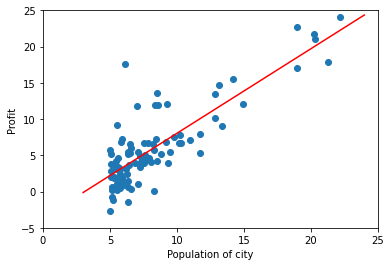

In [138]:
plt.scatter(data['population'], data['profit'])
plt.axis([0, 25, -5, 25])
x0 = np.linspace(3, 24, 2)
y0 = x0 * result_theta[1] + result_theta[0]
plt.plot(x0, y0, 'r')
plt.xlabel('Population of city')
plt.ylabel('Profit')
plt.show()

In [254]:
def predict(x, theta):
    return sum(np.dot(np.array([1, x]), theta))


In [64]:
predict(3.5, result_theta)

0.4522876458065772

Text(0, 0.5, 'Price')

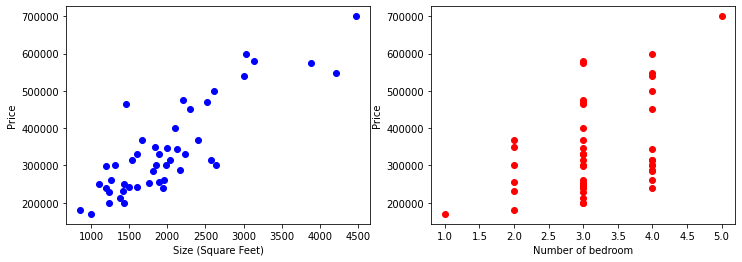

In [255]:
data2 = pd.read_csv('Multi_linear.txt', header=None, names=['size', 'room', 'price'])
data2.head()
data2.describe()
fig, (size_price_fig, room_price_fig) = plt.subplots(1, 2, figsize=(12, 4))
size_price_fig.set_xlabel('Size (Square Feet)')
size_price_fig.set_ylabel('Price')
size_price_fig.scatter(data2['size'], data2['price'], c='b')
room_price_fig.scatter(data2['room'], data2['price'], c='r')
room_price_fig.set_xlabel('Number of bedroom')
room_price_fig.set_ylabel('Price')

In [256]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

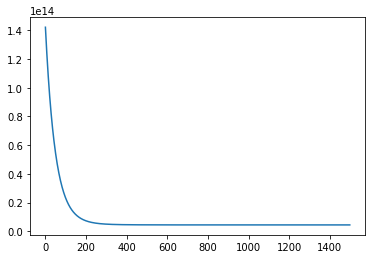

In [261]:
# np.array(data2[['size', 'room']])
np.ones((data2[['size']].shape[0], 1))
init_theta2 = np.zeros((3, 1))
y2 = np.array(data2[['price']])
X2 = np.array(data2[['size', 'room']])
X2, mean_X2, std_X2 = featureNormalization(X2)
ones2 = np.ones((len(X2), 1))
Xbar2 = np.concatenate((ones2, X2), axis=1)
result_theta2, theta_history, J_History =  gradientDescent(Xbar2, y2,init_theta2, 0.01, 500)
result_theta2
plt.plot(J_History)
plt.show()